In [25]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [26]:
df = pd.read_csv("data/UBER.csv")

In [27]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


In [28]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [30]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,725.000000,725.000000,725.000000,725.000000,725.000000,7.250000e+02
mean,40.166447,40.961435,39.261123,40.107255,40.107255,2.472855e+07
std,9.198940,9.259164,9.075919,9.141862,9.141862,1.691406e+07
min,15.960000,17.799999,13.710000,14.820000,14.820000,3.380000e+06
25%,32.730000,33.419998,31.983000,32.799999,32.799999,1.423060e+07
50%,39.000000,39.959999,38.009998,38.810001,38.810001,2.079540e+07
75%,46.700001,47.520000,45.860001,46.419998,46.419998,3.011960e+07
max,63.250000,64.050003,60.799999,63.180000,63.180000,1.863225e+08


In [31]:
def check_stationarity(series):
    result = adfuller(series)
    return result[0], result[1]

In [32]:
adf, p_val = check_stationarity(df['Close'])
print("ADF Statistic: ", adf)
print("p-value: ", p_val)

ADF Statistic:  -2.0446885979662865
p-value:  0.2673287528397378


In [33]:
if p_val <= 0.05:
    print("Data is stationary. Differencing not req")
else:
    print("Data is not stationary. Differencing is req")

Data is not stationary. Differencing is req


In [34]:
df['Close_diff'] = df['Close'].diff().dropna()
adf_, p_val_ = check_stationarity(df['Close_diff'].dropna())
print("ADF Statistic: ", adf_)
print("p-value: ", p_val_)

ADF Statistic:  -17.628191724186358
p-value:  3.809666034735925e-30


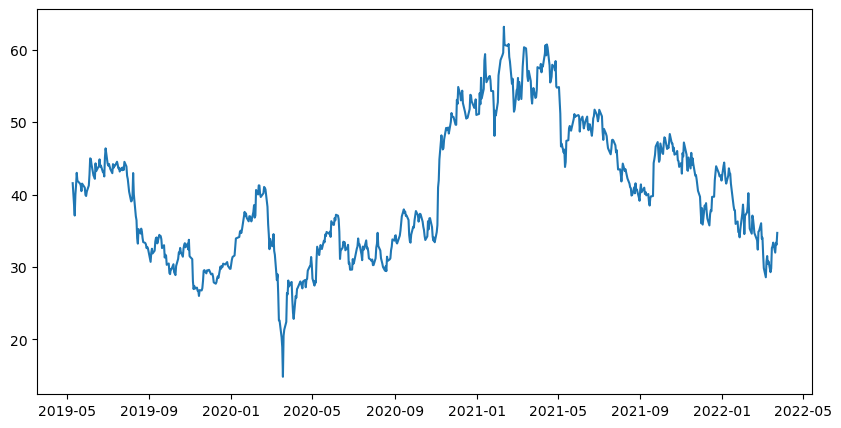

In [35]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.show()

C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


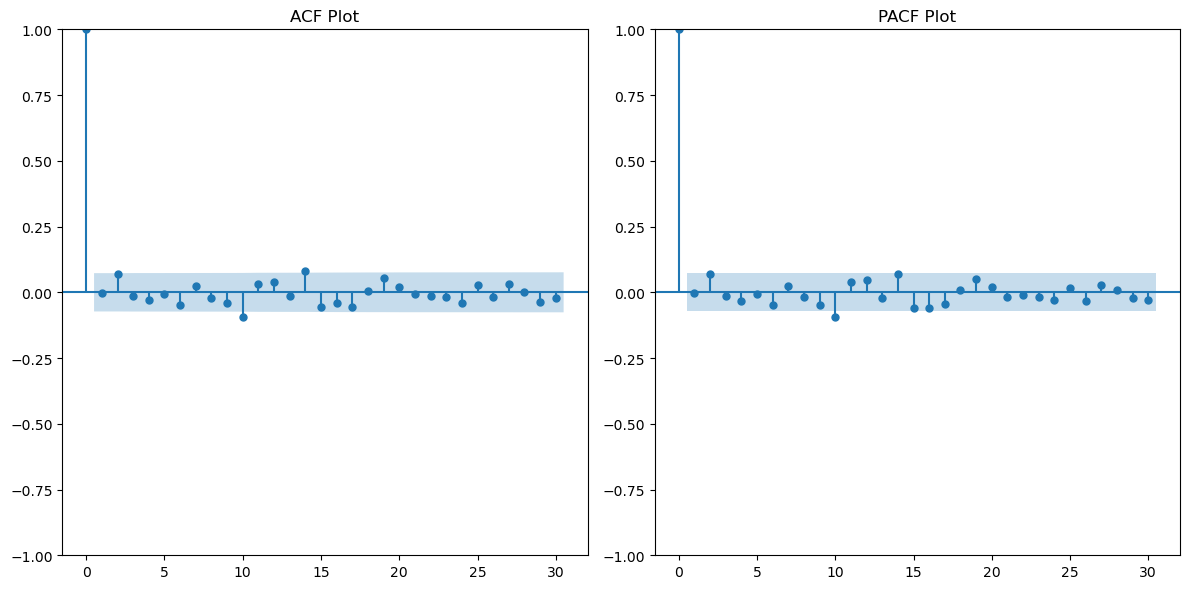

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df['Close_diff'].dropna(), ax=plt.gca(), lags=30)
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df['Close_diff'].dropna(), ax=plt.gca(), lags=30)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

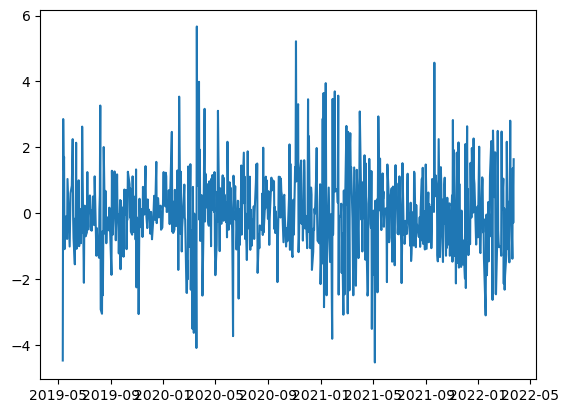

In [37]:
plt.plot(df['Close_diff'])
plt.show()

In [38]:
df['Close_diff'] = df['Close_diff'].clip(lower=-100, upper=100)

In [39]:
df = df.dropna(subset=['Close_diff'])
p, d, q = 1, 1, 1
model = ARIMA(df['Close_diff'], order=(p, d, q))
model_fit = model.fit()

C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close_diff   No. Observations:                  724
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1229.696
Date:                Sun, 13 Apr 2025   AIC                           2465.393
Time:                        14:47:03   BIC                           2479.143
Sample:                             0   HQIC                          2470.700
                                - 724                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       -3.65e-05      0.031     -0.001      0.999      -0.061       0.061
ma.L1         -0.9999      0.126     -7.933      0.000      -1.247      -0.753
sigma2         1.7417      0.226      7.704      0.000       1.299       2.185
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                83.03
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.30
Prob(H) (two-sided):                  0.72   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
# Forecast
forecast = model_fit.get_forecast(steps=730)
forecast_mean = forecast.predicted_mean

# Build future date range
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=730, freq='D')
forecast_series = pd.Series(forecast_mean.values, index=future_dates)

C:\Users\G Varun\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [42]:
# Assume df['Close'] exists and is original price
last_real_close = df['Close'].iloc[-1]

# Reconstruct Close from differenced forecast
forecast_cumsum = forecast_series.cumsum()
forecast_close = last_real_close + forecast_cumsum

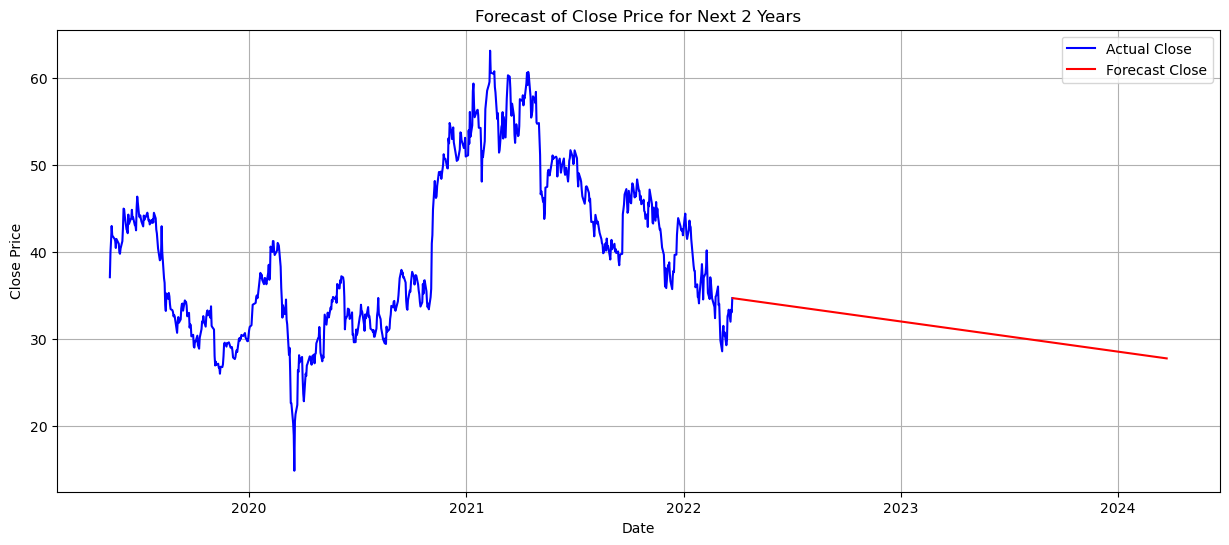

In [43]:
plt.figure(figsize=(15, 6))
plt.plot(df['Close'], label='Actual Close', color='blue')
plt.plot(forecast_close, label='Forecast Close', color='red')
plt.title('Forecast of Close Price for Next 2 Years')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
!pip install keras